### Analisis exploratorio de un restaurante llamado *"El buen sabor*

**🏪 Problemática:**


Un restaurante de comida internacional quiere mejorar su rentabilidad y la experiencia de los clientes. Actualmente cuenta con información registrada en su sistema de ventas:

fecha, hora de cobro, mesa, empleado que atendió, tipo de bebida, producto, categoría, precio, costo, % de propinas, tipo de cliente.

*La administración ha detectado que:*

Las utilidades varían mucho entre días de la semana, pero no tienen claro si depende del tipo de producto vendido o de la cantidad de clientes.

Algunos empleados reciben más propinas que otros, y se sospecha que podría estar relacionado con el tipo de mesa, la categoría de producto o el tipo de cliente que atienden.

Se desconoce si hay productos con bajo margen de ganancia que afectan la rentabilidad total del negocio.

La gerencia quiere saber si existe una relación entre:

El tipo de cliente (repetido, nuevo)

El ticket promedio

El porcentaje de propinas.

*🎯 Objetivos del análisis*

Explorar las ventas por fecha y hora para detectar patrones (¿los fines de semana se vende más?).

Analizar las propinas por empleado y tipo de cliente para ver si existe una tendencia clara.

Calcular utilidades por producto y categoría para detectar los que generan más ganancia y los que no conviene mantener.

Identificar al cliente más rentable (¿quién deja más ingresos netos y propinas?).

Visualizar la distribución de precios, costos y márgenes para entender la estructura de ingresos.

**🔍 Preguntas guía para el EDA**

¿Qué días de la semana generan más ventas y más utilidades?

¿Existen horarios con mayor consumo de bebidas ?

¿Qué categoría (entrada, plato fuerte, postre, bebidas) deja más utilidad bruta?

¿Qué empleados generan mayor facturación y mayores propinas?

¿Los clientes nuevos consumen menos que los regulares?
Clientes que vendieron cervezas

¿Existe relación entre el precio del ticket y el porcentaje de propina?

In [1]:
#Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import random
import numpy as np

In [2]:
#leer el archivo
df = pd.read_excel('Restaurante.xlsx')
df

,Orden,Fecha,Hora de Cobro,Mesa,Atendio,Tipo,Producto,Categoria,Precio,Costo,% Propina,Tipo de Cliente
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo
...,...,...,...,...,...,...,...,...,...,...,...,...
30127,2500,2014-07-17,16:33:36,6,Joel,Comida,Mejillones Horneados,Entradas,75,56.25,0.10,Cliente Nuevo
30128,2500,2014-07-17,16:33:36,6,Joel,Comida,Brochetas Hawaiianas,Entradas,74,56.98,0.10,Cliente Nuevo
30129,2500,2014-07-17,16:33:36,6,Joel,Comida,Panela a la Leña,Entradas,53,42.40,0.10,Cliente Nuevo
30130,2500,2014-07-17,16:33:36,6,Joel,Comida,Vacío,Platos Fuertes,164,132.84,0.10,Cliente Nuevo


In [3]:
#Contar los valores nulos
df.isnull().sum()

Orden              0
Fecha              0
Hora de Cobro      0
Mesa               0
Atendio            0
Tipo               0
Producto           0
Categoria          0
Precio             0
Costo              0
% Propina          0
Tipo de Cliente    0
dtype: int64

In [4]:
#Ver el tipo de datos de cada columna
df.dtypes

Orden                       int64
Fecha              datetime64[ns]
Hora de Cobro              object
Mesa                        int64
Atendio                    object
Tipo                       object
Producto                   object
Categoria                  object
Precio                      int64
Costo                     float64
% Propina                 float64
Tipo de Cliente            object
dtype: object

In [5]:
#Obtener el nombre de los dias de la semana a partir de la fecha
#Convertir la fecha a tipo fecha
#df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Dia Semana']= df['Fecha'].dt.day_name()
df

,Orden,Fecha,Hora de Cobro,Mesa,Atendio,Tipo,Producto,Categoria,Precio,Costo,% Propina,Tipo de Cliente,Dia Semana
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo,Saturday
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo,Saturday
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo,Saturday
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo,Saturday
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30127,2500,2014-07-17,16:33:36,6,Joel,Comida,Mejillones Horneados,Entradas,75,56.25,0.10,Cliente Nuevo,Thursday
30128,2500,2014-07-17,16:33:36,6,Joel,Comida,Brochetas Hawaiianas,Entradas,74,56.98,0.10,Cliente Nuevo,Thursday
30129,2500,2014-07-17,16:33:36,6,Joel,Comida,Panela a la Leña,Entradas,53,42.40,0.10,Cliente Nuevo,Thursday
30130,2500,2014-07-17,16:33:36,6,Joel,Comida,Vacío,Platos Fuertes,164,132.84,0.10,Cliente Nuevo,Thursday


##### Calcular utilidades por producto y categoría para detectar los que generan más ganancia y los que no conviene mantener.


In [6]:
#Obtener la utilidad por producto
df['Utilidad'] = df['Precio'] - df['Costo']
df.head(3)

,Orden,Fecha,Hora de Cobro,Mesa,Atendio,Tipo,Producto,Categoria,Precio,Costo,% Propina,Tipo de Cliente,Dia Semana,Utilidad
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.0,0.07,Cliente Nuevo,Saturday,7.0
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.0,0.07,Cliente Nuevo,Saturday,7.0
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.6,0.07,Cliente Nuevo,Saturday,5.4


In [7]:
#Obtener la propina de cada empleado que atendio
df['Propina'] = df['Precio']* df['% Propina']
df

,Orden,Fecha,Hora de Cobro,Mesa,Atendio,Tipo,Producto,Categoria,Precio,Costo,% Propina,Tipo de Cliente,Dia Semana,Utilidad,Propina
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo,Saturday,7.00,1.75
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo,Saturday,7.00,1.75
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo,Saturday,5.40,1.26
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo,Saturday,6.50,1.75
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo,Saturday,13.35,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30127,2500,2014-07-17,16:33:36,6,Joel,Comida,Mejillones Horneados,Entradas,75,56.25,0.10,Cliente Nuevo,Thursday,18.75,7.50
30128,2500,2014-07-17,16:33:36,6,Joel,Comida,Brochetas Hawaiianas,Entradas,74,56.98,0.10,Cliente Nuevo,Thursday,17.02,7.40
30129,2500,2014-07-17,16:33:36,6,Joel,Comida,Panela a la Leña,Entradas,53,42.40,0.10,Cliente Nuevo,Thursday,10.60,5.30
30130,2500,2014-07-17,16:33:36,6,Joel,Comida,Vacío,Platos Fuertes,164,132.84,0.10,Cliente Nuevo,Thursday,31.16,16.40


In [8]:
#Convertir la hora de cobro a tipo hora
df['Hora de Cobro'] = pd.to_datetime(df['Hora de Cobro'], format='%H:%M:%S')
df['Hora de Cobro'] = df['Hora de Cobro'].dt.time
df


,Orden,Fecha,Hora de Cobro,Mesa,Atendio,Tipo,Producto,Categoria,Precio,Costo,% Propina,Tipo de Cliente,Dia Semana,Utilidad,Propina
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo,Saturday,7.00,1.75
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo,Saturday,7.00,1.75
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo,Saturday,5.40,1.26
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo,Saturday,6.50,1.75
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo,Saturday,13.35,6.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30127,2500,2014-07-17,16:33:36,6,Joel,Comida,Mejillones Horneados,Entradas,75,56.25,0.10,Cliente Nuevo,Thursday,18.75,7.50
30128,2500,2014-07-17,16:33:36,6,Joel,Comida,Brochetas Hawaiianas,Entradas,74,56.98,0.10,Cliente Nuevo,Thursday,17.02,7.40
30129,2500,2014-07-17,16:33:36,6,Joel,Comida,Panela a la Leña,Entradas,53,42.40,0.10,Cliente Nuevo,Thursday,10.60,5.30
30130,2500,2014-07-17,16:33:36,6,Joel,Comida,Vacío,Platos Fuertes,164,132.84,0.10,Cliente Nuevo,Thursday,31.16,16.40


In [9]:
#dia de la semana que generan mas ventas, y mas utilidades
ventas_dia_utilidad = pd.pivot_table(df, values=['Precio', 'Utilidad'], index='Dia Semana', aggfunc='sum').sort_values(by='Precio', ascending=False)
ventas_dia_utilidad

,Precio,Utilidad
Dia Semana,,
Friday,362035,88057.35
Saturday,318979,77340.82
Monday,302833,70797.33
Sunday,280939,64354.40
Wednesday,274922,63791.14
Thursday,263759,60386.51
Tuesday,248162,56175.26


In [10]:
#Ver las ventas por categorias
ventas_categorias = pd.pivot_table(df, values='Precio', index='Categoria', aggfunc='sum').sort_values(by='Precio', ascending=False)
ventas_categorias

,Precio
Categoria,
Pizzas,385188
Platos Fuertes,353625
Vinos,272799
Ensaladas,199209
Bebida no Alcohol,194480
Entradas,193511
Cervezas,191595
Pastas,92367
Postres,91509


In [11]:
#Que horario tiene mayor consumo de bebidas
# Filtrar únicamente los registros de tipo bebida
bebidas = df[df["Tipo"] == "Bebida"]
# Agrupar por la hora y sumar ventas
hora_bebidas = bebidas.groupby("Hora de Cobro")["Precio"].sum().reset_index().sort_values(by='Precio', ascending=False)
hora_bebidas.head(5)


,Hora de Cobro,Precio
45,23:31:12,23518
27,19:12:00,21339
33,20:38:24,20926
35,21:07:12,20067
36,21:21:36,19519


In [12]:
#Propinas por empleado
propinas_empleado = pd.pivot_table(df, values='Propina', index='Atendio', aggfunc='sum').sort_values(by='Propina', ascending=True)
propinas_empleado

,Propina
Atendio,
Valentina,22298.68
Rodolfo,24196.17
Mariana,24833.65
Saul,25933.32
Alejandro,26521.00
Omar,27376.37
Joel,28331.50
Ernesto,28550.43
Mauricio,32510.60


In [13]:
#Ventas por empleados que atendio
atendio_venta = pd.pivot_table(df, values='Precio', index='Atendio', aggfunc='sum').sort_values(by='Precio', ascending=True)
atendio_venta

,Precio
Atendio,
Mauricio,162553
Valentina,213412
Mariana,226102
Saul,227021
Rodolfo,229544
Omar,242081
Alejandro,244434
Ernesto,252636
Joel,253846


In [14]:
#ver cuales son los clientes mas rentables
clientes_rentables = pd.pivot_table(df, values='Precio', index='Tipo de Cliente', aggfunc='sum')
clientes_rentables

,Precio
Tipo de Cliente,
Cliente Nuevo,1456971
Cliente Repetido,594658


In [15]:
#Obtener el ticket del cliente
ticket_cliente = df.groupby('Atendio', as_index=False).agg(
    ticket_promedio=('Precio','mean'),
    propina_promedio=('Propina','mean'),
    pct_prop_promedio=('% Propina','mean'),
    cuentas=('Precio','count')
)
ticket_cliente

,Atendio,ticket_promedio,propina_promedio,pct_prop_promedio,cuentas
0,Alejandro,71.263557,7.732070,0.107915,3430
1,Ernesto,70.274270,7.941705,0.111613,3595
2,Joel,71.405345,7.969480,0.111800,3555
3,Mariana,66.874298,7.345061,0.109825,3381
4,Mauricio,58.981495,11.796299,0.200000,2756
5,Omar,67.943026,7.683517,0.111976,3563
6,Rodolfo,66.844496,7.046060,0.107440,3434
7,Saul,68.773402,7.856201,0.112254,3301
8,Valentina,68.467116,7.153892,0.105980,3117


In [16]:
#Número de ventas por día
vent = df.groupby(df["Fecha"].dt.day)["Producto"].count().reset_index().sort_values(by='Producto', ascending=True)
vent

,Fecha,Producto
30,31,685
25,26,732
1,2,749
4,5,896
28,29,903
29,30,904
2,3,910
27,28,912
15,16,913
5,6,923


In [17]:
#Propina promedio por tipo de cliente
promedio_client = pd.pivot_table(df, values='Propina', index='Tipo de Cliente', aggfunc='mean').round(2)
promedio_client

,Propina
Tipo de Cliente,
Cliente Nuevo,7.80
Cliente Repetido,8.51


In [18]:
#ventas por dia de la semana
semana_venta = pd.pivot_table(df, values='Precio', index='Dia Semana', aggfunc='sum')
semana_venta

,Precio
Dia Semana,
Friday,362035
Monday,302833
Saturday,318979
Sunday,280939
Thursday,263759
Tuesday,248162
Wednesday,274922


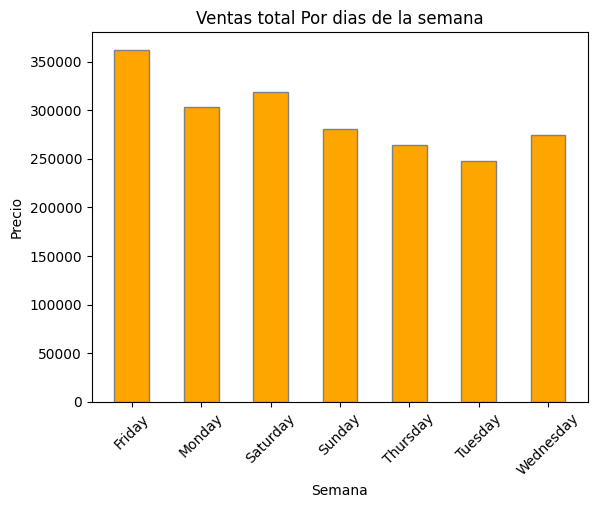

In [19]:
#Graficar las ventas por dia de la semana
#Graficar
plt.Figure(figsize=(8,14))
plt.bar(semana_venta.index, semana_venta['Precio'], color='orange', edgecolor='gray', width=0.5)
plt.xlabel('Semana')
plt.title('Ventas total Por dias de la semana')
plt.ylabel('Precio')
#plt.yticks(np.arange(0, 380000, 90000))
plt.xticks(rotation=45)
plt.show()


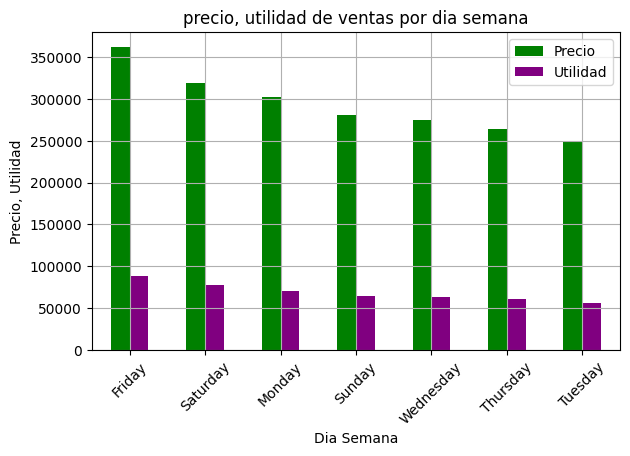

In [20]:
#Graficar los dias de la semana que generan mas ventas, y mas utilidades
ventas_dia_utilidad.plot(kind='bar', color=['green', 'purple'], width=0.5)
#plt.legend(ventas_dia_utilidad.index)
plt.ylabel('Precio, Utilidad')
plt.title('precio, utilidad de ventas por dia semana')
plt.tight_layout() 
plt.grid(True)
plt.xticks(rotation=45)
plt.axis(True)
plt.show()

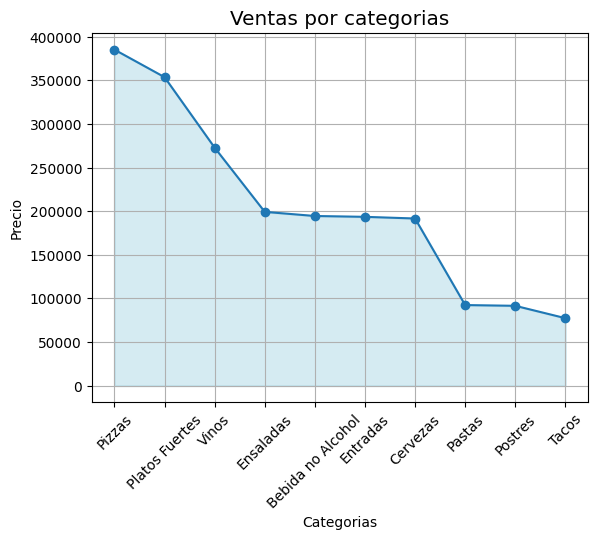

In [21]:
#Graficar las ventas por categorias
#Crear una grafica de area
plt.Figure(figsize=(50,20))
plt.fill_between(ventas_categorias.index, ventas_categorias['Precio'], color='lightblue', alpha=0.5, label='ventas', linewidth=1.5)
plt.xticks(rotation=45)
plt.style.use('ggplot')  
plt.title('Ventas por categorias')
plt.ylabel('Precio')
plt.xlabel('Categorias')
plt.grid(True)
plt.plot(ventas_categorias.index, ventas_categorias['Precio'], marker='o')
plt.show()


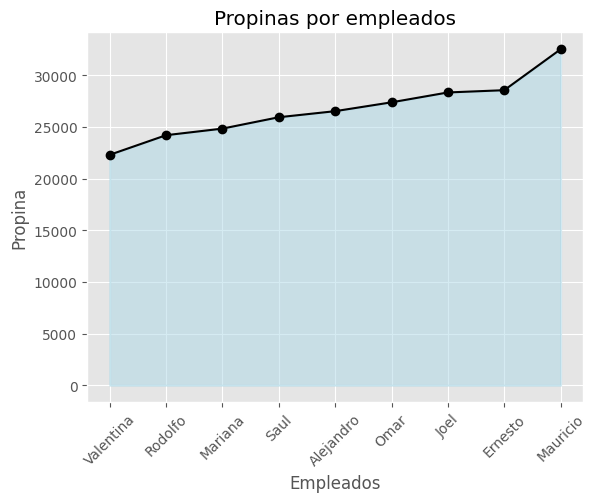

In [22]:
#Propinas por empleados
plt.fill_between(propinas_empleado.index, propinas_empleado['Propina'], color='lightblue', alpha=0.5, label='ventas', linewidth=1.5)
plt.plot(propinas_empleado.index, propinas_empleado['Propina'], marker='o', color='black')
plt.xticks(rotation=45)
plt.title('Propinas por empleados')
plt.xlabel('Empleados')
plt.ylabel('Propina')
plt.grid(True)
#plt.style.use('ggplot') 
plt.show()

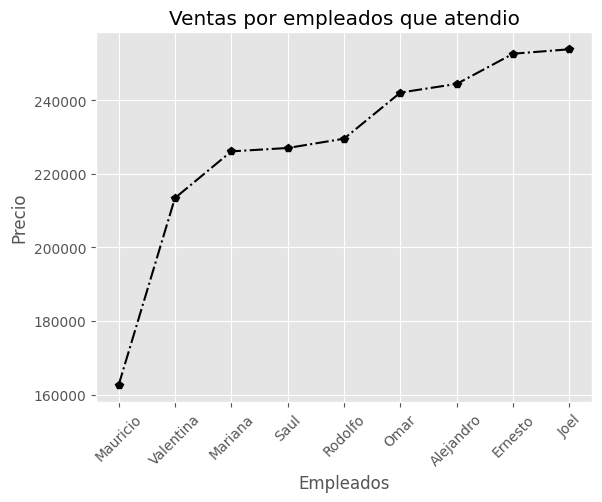

In [23]:
#Graficar las ventas por empleados
plt.plot(atendio_venta.index, atendio_venta['Precio'], linestyle='-.', marker='p', color='black')
plt.xticks(rotation=45)
plt.title('Ventas por empleados que atendio')
plt.xlabel('Empleados')
plt.ylabel('Precio')
plt.grid(True)
#plt.style.use('ggplot') 
plt.show()

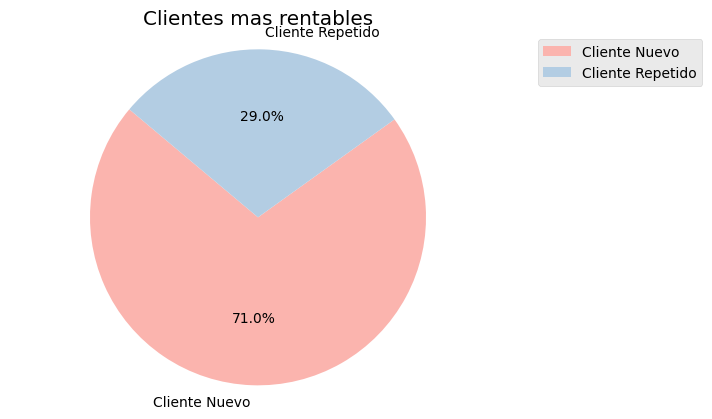

In [24]:
#Graficar por clientes rentables
plt.Figure(figsize=(10, 12))
plt.pie(clientes_rentables['Precio'], labels=clientes_rentables.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Clientes mas rentables')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')  
plt.show()

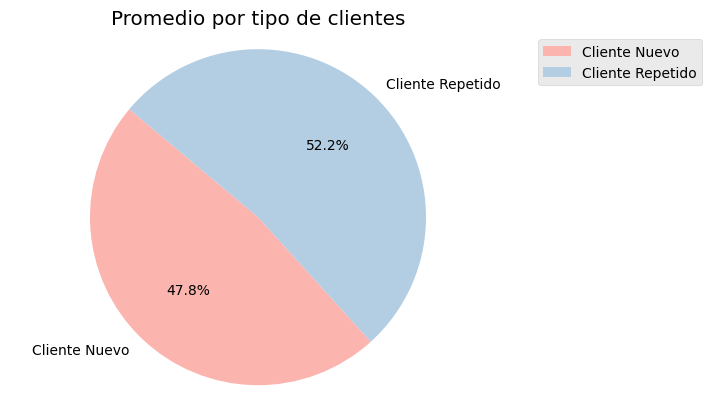

In [25]:
#Propina promedio por tipo de cliente
plt.Figure(figsize=(10, 12))
plt.pie(promedio_client['Propina'], labels=promedio_client.index, autopct='%1.1f%%', 
        startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Promedio por tipo de clientes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')  
plt.show()

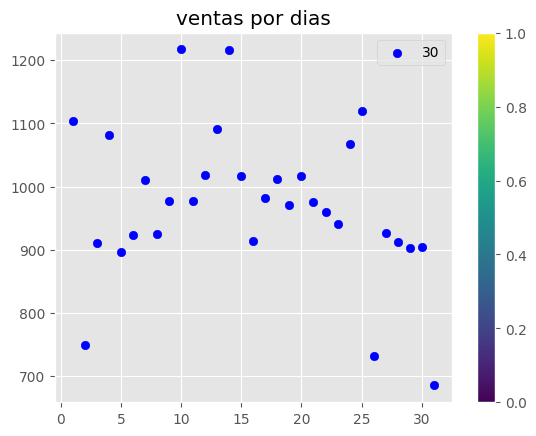

In [26]:
plt.scatter(vent['Fecha'], vent['Producto'], color='b')
plt.legend(vent.index)
plt.title('ventas por dias')
plt.colorbar()#Muestra la barra de colores
plt.show()

In [45]:
# Filtrar únicamente los registros de Cervezas
cerveza = df[df["Categoria"] == "Cervezas"]
# Agrupar por la hora y sumar ventas
atendio_cerveza = pd.pivot_table(cerveza, values='Precio', index='Atendio', aggfunc='sum').sort_values(by='Precio', ascending=True)
atendio_cerveza

,Precio
Atendio,
Mauricio,17895
Valentina,20065
Mariana,20595
Saul,20920
Alejandro,22150
Joel,22235
Rodolfo,22385
Omar,22480
Ernesto,22870


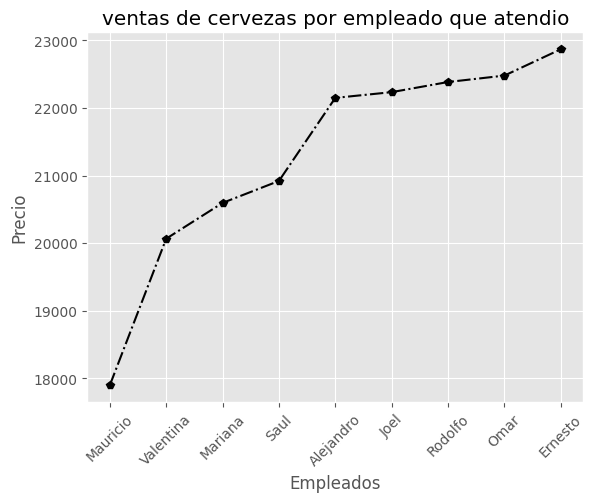

In [47]:
#Graficar las empleados que vendieron cervezas
plt.plot(atendio_cerveza.index, atendio_cerveza['Precio'], linestyle='-.', marker='p', color='black')
plt.xticks(rotation=45)
plt.title('ventas de cervezas por empleado que atendio')
plt.xlabel('Empleados')
plt.ylabel('Precio')
plt.grid(True)
#plt.style.use('ggplot') 
plt.show()